# Домашка 2

In [1]:
import functools as ft
import math
import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stats

## № 1

Sample: [1.1, 2.1, 1.3, 0.9, 2.7, 1.4, 1.6, 1.3, 1.4, 2.4]
Ordered: [0.9, 1.1, 1.3, 1.3, 1.4, 1.4, 1.6, 2.1, 2.4, 2.7]
Mean: 1.62
Variance: 0.3096


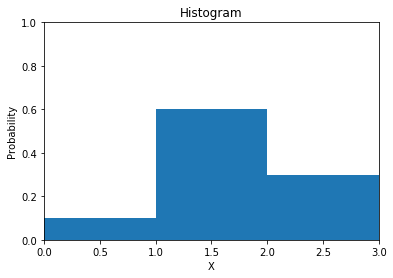

In [2]:
X = [1.1, 2.1, 1.3, 0.9, 2.7, 1.4, 1.6, 1.3, 1.4, 2.4]

print('Sample:', X)
print('Ordered:', sorted(X))

X = np.array(X)

print('Mean:', X.mean())
print('Variance:', X.var())

bins = [0, 1, 2, 3]
plt.hist(X, bins, normed=True)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Histogram')
plt.axis([0, 3, 0, 1])
plt.show()


## № 2


In [3]:
def expected_number_of_intervals(m, n):
    h = (m - 1) / m
    return m * (h ** n)

N = 1000
m = 1
while expected_number_of_intervals(m, N) <= 0.02:
    m += 1

print('m-1:', m-1, '=>', expected_number_of_intervals(m-1, N))
print('  m:', m, '=>', expected_number_of_intervals(m, N))

m-1: 115 => 0.018522893223552685
  m: 116 => 0.02015158059940172


## № 12

In [4]:
X = [1, 2, 1, 5, 7, 8, 16, -3, -2]
X = np.array(X)

def F(X, a):
    return sum(abs(X - a))

f = ft.partial(F, X)

result = opt.minimize_scalar(f)

print('Likelihood of sample is maximized at:', result.x)

Likelihood of sample is maximized at: 1.99999999038


## № 14
Exponential distribution generation

### (a)

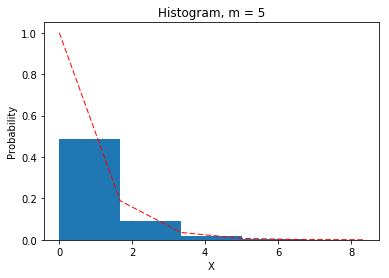

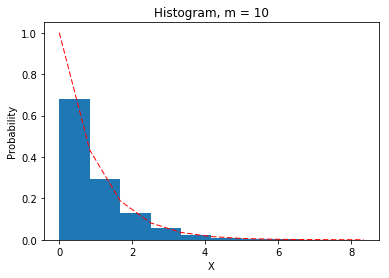

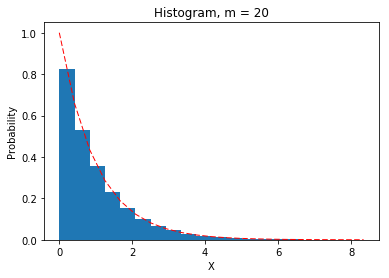

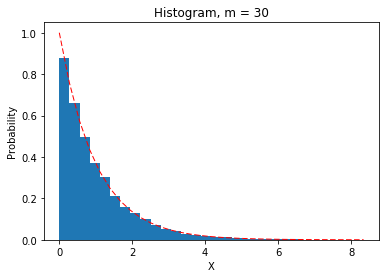

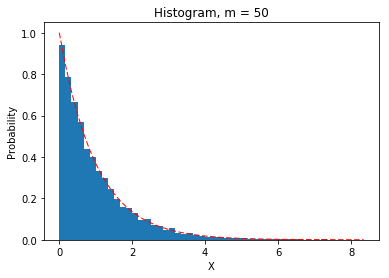

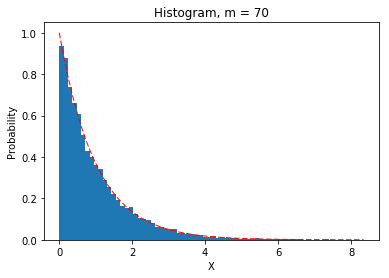

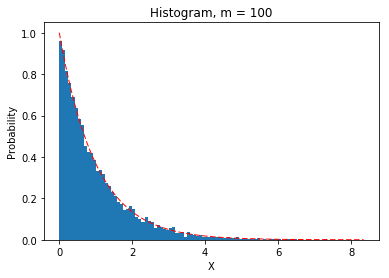

In [5]:
expon = stats.expon

n = 10000
X = expon.rvs(size=n)

def plot_histogram(X, m):
    n, bins, patches = plt.hist(X, m, normed=True)
    y = expon.pdf(bins)
    plt.plot(bins, y, 'r--', linewidth=1)
    plt.xlabel('X')
    plt.ylabel('Probability')
    plt.title('Histogram, m = {}'.format(m))
    plt.show()

for m in (5, 10, 20, 30, 50, 70, 100):
    plot_histogram(X, m)


### (b)

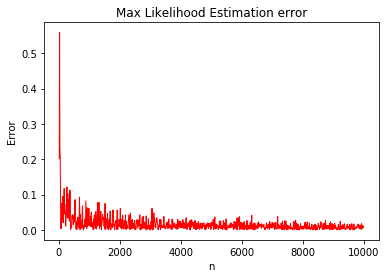

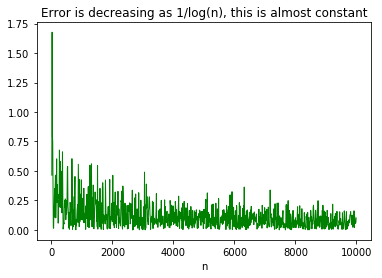

In [6]:
def mle(X):
    return 1 / X.mean()

XN = np.array(range(10, 10000, 10))
Y = np.array([abs(mle(expon.rvs(size=n)) - 1) for n in XN])

plt.plot(XN, Y, 'r-', linewidth=1)
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Max Likelihood Estimation error')
plt.show()

plt.plot(XN, np.log(XN)*Y, 'g-', linewidth=1)
plt.xlabel('n')
plt.title('Error is decreasing as 1/log(n), this is almost constant')
plt.show()


## № 15

### (a)

In [7]:
uniform = stats.uniform

def D_n(n, out=False):
    X = uniform.rvs(size=n)
    H = np.histogram(X, bins='auto', density=True)
    D = stats.rv_histogram(H)
    f = lambda x: -1 * abs(D.cdf(x) - uniform.cdf(x))
    x_ = opt.minimize_scalar(f, method='bounded', bounds=(0, 1)).x
    return -1 * f(x_)

D5_sample = [D_n(5) for __ in range(100)]
D5_sample = np.array(D5_sample)

print('Mean:', D5_sample.mean())
print('Variance:', D5_sample.var())

Mean: 0.271774332748
Variance: 0.0198369726173


### (b)

In [8]:
sample_size = 100

def prob_est(m, eps):
    Dm_sample = [D_n(m) for __ in range(sample_size)]
    p = sum(1 for d in Dm_sample if d > eps) / float(sample_size)
    return p

def estimate_m():
    eps = 0.1
    m = 80
    while prob_est(m, eps) > 0.05:
        m += 10
    return m

M_sample = [estimate_m() for __ in range(5)]
M_sample = np.array(M_sample)

print('Mean(m):', M_sample.mean())

Mean(m): 108.0
